In [1]:
pip install pandas openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   --------------------------- ------------ 174.1/250.0 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
pd.set_option('display.max_columns', None)

air_quality_data_path = 'air_quality_lung_cancer.xlsx'
smoking_data_path = 'smoking_data.csv'

# Reading the Excel file
df_air_quality = pd.read_excel(air_quality_data_path)

# Reading the CSV file
df_smoking_data = pd.read_csv(smoking_data_path, index_col=0)


In [4]:
df_air_quality

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,Intercept,Slope,CLU50_1,PM10,SO2,NO2,O3,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,42.94,2.60,1,15.07,10.661088,123.657648,522.38,4.463225,0.054815,0.388556,0.008080,0.955385,-1.109728,0.00,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,40.54,2.76,2,19.99,17.146847,247.742253,540.79,12.875833,0.021069,0.428278,0.001090,0.717964,-0.565911,0.20,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,77.48,-0.11,3,15.77,23.257118,183.193624,896.42,19.620539,0.014027,0.199725,0.000513,0.131007,-0.978090,-0.95,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,-6.00,7.64,4,14.92,7.630953,127.779935,563.48,2.951976,0.009613,0.211741,0.000225,0.065289,-0.968173,-1.09,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,37.83,3.36,5,17.90,8.913795,95.198094,561.94,9.362215,0.022128,0.300100,0.000429,0.402194,-0.718645,-0.51,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,56037,Sweetwat,WY,45.3,6.40,0,0.329106,0.832869,1.309324,5.31,41.01,1.62,40,11.26,51.633922,342.108999,1703.31,422.322102,0.007201,0.204528,0.000227,-0.039545,1.130375,1.09,1,35.4,57.0,NaN,NaN,NaN,NaN,NaN,16,stable
2598,56039,Teton Co,WY,22.6,6.67,0,0.316508,1.812128,2.418939,1.14,26.57,1.47,47,10.40,39.036416,322.610755,3614.23,3754.236317,0.005966,0.080880,0.000114,-0.557297,1.071576,1.67,1,14.1,34.4,NaN,NaN,NaN,NaN,NaN,5,stable
2599,56041,Uinta Co,WY,37.1,6.57,0,0.253324,0.715908,1.134188,10.86,35.80,2.37,39,8.35,65.490741,529.309963,3467.05,1109.005206,0.002770,0.089568,0.000245,-0.814369,1.162652,0.69,1,25.2,52.5,NaN,NaN,NaN,NaN,NaN,7,stable
2600,56043,Washakie,WY,51.1,6.33,0,0.151024,-0.067995,0.728454,10.52,34.90,3.30,13,7.21,157.728659,284.452099,2819.26,199.103987,0.011684,0.157553,0.000184,-0.244298,1.004629,0.38,1,35.1,73.3,NaN,NaN,NaN,NaN,NaN,7,stable


In [5]:
df_smoking_data

,State,County,FIPS,X2000,smokerate2000
1,AL,autauga county,1001,"26.0 (22.3,30.1)",0.260
2,AL,baldwin county,1003,"26.4 (23.2,29.8)",0.264
3,AL,barbour county,1005,"28.4 (24.3,32.8)",0.284
4,AL,bibb county,1007,"29.6 (25.3,34.1)",0.296
5,AL,blount county,1009,"30.2 (26.2,34.9)",0.302
...,...,...,...,...,...
3106,WY,sweetwater county,56037,"27.6 (24.9,30.7)",0.276
3107,WY,teton county,56039,"16.6 (14.1,19.6)",0.166
3108,WY,uinta county,56041,"24.9 (21.9,28.1)",0.249
3109,WY,washakie county,56043,"24.7 (21.6,28.2)",0.247


In [6]:
df_smoking_data.drop('County', axis=1, inplace=True)
smoking_airquality_df = pd.merge(df_air_quality, df_smoking_data, how='inner', left_on=['FIPS_code', 'State'], right_on=['FIPS', 'State'])
smoking_airquality_df.drop('FIPS', axis=1, inplace=True)
smoking_airquality_df_initial_df = smoking_airquality_df.copy()

In [7]:
smoking_airquality_df

,FIPS_code,County,State,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,Intercept,Slope,CLU50_1,PM10,SO2,NO2,O3,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,RT,X2000,smokerate2000
0,1001,Autauga,AL,73.9,12.06,1,-0.706591,0.670436,-0.497301,4.79,42.94,2.60,1,15.07,10.661088,123.657648,522.38,4.463225,0.054815,0.388556,0.008080,0.955385,-1.109728,0.00,2,64.3,84.6,42.94,2.60,68.6143,73.4043,4.7900,44,stable,"26.0 (22.3,30.1)",0.260
1,1003,Baldwin,AL,68.4,11.12,1,-1.084299,0.553073,0.401585,3.68,40.54,2.76,2,19.99,17.146847,247.742253,540.79,12.875833,0.021069,0.428278,0.001090,0.717964,-0.565911,0.20,2,63.9,73.1,40.54,2.76,66.0568,69.7357,3.6789,181,stable,"26.4 (23.2,29.8)",0.264
2,1005,Barbour,AL,76.1,12.36,1,-1.281470,-1.236294,0.048854,0.87,77.48,-0.11,3,15.77,23.257118,183.193624,896.42,19.620539,0.014027,0.199725,0.000513,0.131007,-0.978090,-0.95,2,63.3,90.9,77.48,-0.11,75.7286,76.6000,0.8714,26,stable,"28.4 (24.3,32.8)",0.284
3,1007,Bibb Cou,AL,86.4,12.24,1,-0.827410,-0.600018,-1.290857,19.95,-6.00,7.64,4,14.92,7.630953,127.779935,563.48,2.951976,0.009613,0.211741,0.000225,0.065289,-0.968173,-1.09,2,71.2,104.1,-6.00,7.64,65.9182,85.8692,19.9510,23,stable,"29.6 (25.3,34.1)",0.296
4,1009,Blount C,AL,73.1,12.97,1,-0.622934,0.296509,-1.262740,19.95,37.83,3.36,5,17.90,8.913795,95.198094,561.94,9.362215,0.022128,0.300100,0.000429,0.402194,-0.718645,-0.51,2,64.5,82.6,37.83,3.36,69.9500,76.9564,7.0064,54,stable,"30.2 (26.2,34.9)",0.302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,56037,Sweetwat,WY,45.3,6.40,0,0.329106,0.832869,1.309324,5.31,41.01,1.62,40,11.26,51.633922,342.108999,1703.31,422.322102,0.007201,0.204528,0.000227,-0.039545,1.130375,1.09,1,35.4,57.0,NaN,NaN,NaN,NaN,NaN,16,stable,"27.6 (24.9,30.7)",0.276
2591,56039,Teton Co,WY,22.6,6.67,0,0.316508,1.812128,2.418939,1.14,26.57,1.47,47,10.40,39.036416,322.610755,3614.23,3754.236317,0.005966,0.080880,0.000114,-0.557297,1.071576,1.67,1,14.1,34.4,NaN,NaN,NaN,NaN,NaN,5,stable,"16.6 (14.1,19.6)",0.166
2592,56041,Uinta Co,WY,37.1,6.57,0,0.253324,0.715908,1.134188,10.86,35.80,2.37,39,8.35,65.490741,529.309963,3467.05,1109.005206,0.002770,0.089568,0.000245,-0.814369,1.162652,0.69,1,25.2,52.5,NaN,NaN,NaN,NaN,NaN,7,stable,"24.9 (21.9,28.1)",0.249
2593,56043,Washakie,WY,51.1,6.33,0,0.151024,-0.067995,0.728454,10.52,34.90,3.30,13,7.21,157.728659,284.452099,2819.26,199.103987,0.011684,0.157553,0.000184,-0.244298,1.004629,0.38,1,35.1,73.3,NaN,NaN,NaN,NaN,NaN,7,stable,"24.7 (21.6,28.2)",0.247


In [8]:
smoking_airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2594
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS_code        2595 non-null   int64  
 1   County           2595 non-null   object 
 2   State            2595 non-null   object 
 3   Lung Cancer      2595 non-null   float64
 4   PM2.5            2595 non-null   float64
 5   Status Variable  2595 non-null   int64  
 6   Land_EQI         2595 non-null   float64
 7   Sociod_EQI       2595 non-null   float64
 8   Built_EQI        2595 non-null   float64
 9   LTD              2595 non-null   float64
 10  Intercept        2595 non-null   float64
 11  Slope            2595 non-null   float64
 12  CLU50_1          2595 non-null   int64  
 13  PM10             2595 non-null   float64
 14  SO2              2595 non-null   float64
 15  NO2              2595 non-null   float64
 16  O3               2595 non-null   float64
 17  CO            

In [9]:
smoking_airquality_df.describe()

,FIPS_code,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,Intercept,Slope,CLU50_1,PM10,SO2,NO2,O3,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,LCI,UCI,Inter,Slp,control,treat,Local_Treat,AAC,smokerate2000
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,50.000000,50.000000,50.000000,48.000000,48.000000,2595.000000,2595.000000
mean,30805.073988,69.208748,10.146432,0.507129,0.048940,0.007423,0.077490,12.308547,38.174158,3.075461,25.214644,11.924066,234.116805,594.683132,5139.612185,606.346296,0.024296,0.393826,0.005463,0.210338,0.042160,0.125942,1.507129,57.226012,84.005934,42.526600,1.542600,64.120496,74.504144,10.848558,76.089017,0.270867
std,15648.329416,17.422769,2.309980,0.500046,0.801602,0.992571,0.863510,10.520131,18.867774,1.893097,14.506153,4.833739,407.639058,571.132417,4303.430163,799.280137,0.044804,0.388846,0.073255,0.824446,0.987004,0.885204,0.500046,16.122668,21.772661,37.839886,10.657343,9.897221,9.807035,10.979733,175.340643,0.035549
min,1001.000000,12.900000,4.080000,0.000000,-5.044657,-4.809990,-3.992723,-22.440000,-32.970000,-1.150000,1.000000,2.800000,1.783387,6.103853,89.430000,1.256024,0.000128,0.016877,0.000000,-2.819050,-1.641266,-3.220000,1.000000,9.200000,17.500000,-32.970000,-70.630000,39.700000,40.840000,-22.440000,3.000000,0.106000
25%,18038.000000,58.050000,8.480000,0.000000,-0.395562,-0.651387,-0.441612,5.860000,32.460000,2.360000,13.000000,8.175000,45.205635,236.166733,2912.165000,186.725576,0.007172,0.192868,0.000123,-0.285162,-0.911400,-0.455000,1.000000,46.350000,70.000000,30.252500,1.695000,58.797000,70.618300,4.283850,14.000000,0.250000
50%,31015.000000,68.700000,10.650000,1.000000,0.179627,0.000072,0.176461,10.520000,35.420000,3.150000,24.000000,11.530000,143.667315,459.085593,4582.720000,357.536406,0.015430,0.297561,0.000322,0.231804,0.250121,0.130000,2.000000,58.300000,82.500000,36.815000,2.905000,62.462450,76.394000,8.531450,28.000000,0.273000
75%,46085.000000,79.450000,11.865000,1.000000,0.651909,0.615649,0.684714,15.260000,45.590000,3.440000,40.000000,14.780000,308.430401,780.092340,6604.170000,954.595299,0.030438,0.466989,0.000944,0.778617,0.909933,0.750000,2.000000,67.500000,96.200000,50.250000,3.647500,69.900550,78.289300,15.085850,66.000000,0.294000
max,56045.000000,169.900000,16.910000,1.000000,2.094526,3.979472,3.883786,50.640000,89.590000,10.540000,50.000000,39.550000,12180.530830,8661.626630,80276.760000,24815.739310,1.349342,8.815116,2.300000,2.789840,1.478177,2.850000,2.000000,138.600000,224.400000,255.860000,10.540000,99.800000,96.088200,50.638200,3650.000000,0.383000


# Data Preperation

## Missing Values

In [10]:
missing_values_count = smoking_airquality_df.isna().sum()
print(missing_values_count)

FIPS_code             0
County                0
State                 0
Lung Cancer           0
PM2.5                 0
Status Variable       0
Land_EQI              0
Sociod_EQI            0
Built_EQI             0
LTD                   0
Intercept             0
Slope                 0
CLU50_1               0
PM10                  0
SO2                   0
NO2                   0
O3                    0
CO                    0
CN                    0
Disel                 0
CS2                   0
Air_EQI               0
Water_EQI             0
EQI                   0
Status                0
LCI                   0
UCI                   0
Inter              2545
Slp                2545
control            2545
treat              2547
Local_Treat        2547
AAC                   0
RT                    0
X2000                 0
smokerate2000         0
dtype: int64


Since Inter, Slp, control, treat and Local_Treat have the majority of their rows with NA values, these columns will be dropped

In [11]:
smoking_airquality_df.dropna(axis=1, inplace=True)

## Duplicates

In [12]:
duplicates = smoking_airquality_df[smoking_airquality_df.duplicated(keep=False)]
print(duplicates)

     FIPS_code   County State  Lung Cancer  PM2.5  Status Variable  Land_EQI  \
219       8013  Boulder    CO         33.0   7.07                0  1.470195   
220       8013  Boulder    CO         33.0   7.07                0  1.470195   

     Sociod_EQI  Built_EQI   LTD  Intercept  Slope  CLU50_1  PM10        SO2  \
219    1.946719   1.111255  6.89      32.96   2.14       43  17.3  15.794302   
220    1.946719   1.111255  6.89      32.96   2.14       43  17.3  15.794302   

            NO2       O3          CO        CN     Disel       CS2   Air_EQI  \
219  523.520402  2935.17  201.044648  0.036017  0.794464  0.000224  0.666438   
220  523.520402  2935.17  201.044648  0.036017  0.794464  0.000224  0.666438   

     Water_EQI   EQI  Status   LCI   UCI  AAC      RT             X2000  \
219   0.905035  1.96       1  30.0  36.3   92  stable  21.5 (19.9,23.2)   
220   0.905035  1.96       1  30.0  36.3   92  stable  21.5 (19.9,23.2)   

     smokerate2000  
219          0.215  
220      

In [13]:
smoking_airquality_df = smoking_airquality_df.drop_duplicates()

## Categorical Data

In [14]:
# The smoking data is in a weird format, fixing that here
split_columns = smoking_airquality_df['X2000'].str.extract(r'([0-9.]+) \(([0-9.]+),([0-9.]+)\)')

split_columns.columns = ['smoking_data', 'LCI_smoking', 'UCI_smoking']

split_columns = split_columns.astype(float)

smoking_airquality_df = pd.concat([smoking_airquality_df.drop('X2000', axis=1), split_columns], axis=1)

print(smoking_airquality_df.head())

   FIPS_code    County State  Lung Cancer  PM2.5  Status Variable  Land_EQI  \
0       1001   Autauga    AL         73.9  12.06                1 -0.706591   
1       1003   Baldwin    AL         68.4  11.12                1 -1.084299   
2       1005   Barbour    AL         76.1  12.36                1 -1.281470   
3       1007  Bibb Cou    AL         86.4  12.24                1 -0.827410   
4       1009  Blount C    AL         73.1  12.97                1 -0.622934   

   Sociod_EQI  Built_EQI    LTD  Intercept  Slope  CLU50_1   PM10        SO2  \
0    0.670436  -0.497301   4.79      42.94   2.60        1  15.07  10.661088   
1    0.553073   0.401585   3.68      40.54   2.76        2  19.99  17.146847   
2   -1.236294   0.048854   0.87      77.48  -0.11        3  15.77  23.257118   
3   -0.600018  -1.290857  19.95      -6.00   7.64        4  14.92   7.630953   
4    0.296509  -1.262740  19.95      37.83   3.36        5  17.90   8.913795   

          NO2      O3         CO        CN  

In [15]:
# Let's replace RT in ordinal encoding, also notice that there is a decent amount of null values but we need those
# rows, ket's fill it in with the median encoded value of this column
smoking_airquality_df["RT"].value_counts()

stable     2262
falling     234
rising       51
*            47
Name: RT, dtype: int64

In [16]:
dict_map = {'rising': 3, 'stable': 2, 'falling': 1, '*': pd.NA}
smoking_airquality_df['RT'] = smoking_airquality_df['RT'].replace(dict_map)
# smoking_airquality_df['RT'].replace('*', pd.NA, inplace=True) # not working for me - EY
smoking_airquality_df['RT'] = smoking_airquality_df['RT'].fillna(smoking_airquality_df['RT'].median())
print(smoking_airquality_df.head())

   FIPS_code    County State  Lung Cancer  PM2.5  Status Variable  Land_EQI  \
0       1001   Autauga    AL         73.9  12.06                1 -0.706591   
1       1003   Baldwin    AL         68.4  11.12                1 -1.084299   
2       1005   Barbour    AL         76.1  12.36                1 -1.281470   
3       1007  Bibb Cou    AL         86.4  12.24                1 -0.827410   
4       1009  Blount C    AL         73.1  12.97                1 -0.622934   

   Sociod_EQI  Built_EQI    LTD  Intercept  Slope  CLU50_1   PM10        SO2  \
0    0.670436  -0.497301   4.79      42.94   2.60        1  15.07  10.661088   
1    0.553073   0.401585   3.68      40.54   2.76        2  19.99  17.146847   
2   -1.236294   0.048854   0.87      77.48  -0.11        3  15.77  23.257118   
3   -0.600018  -1.290857  19.95      -6.00   7.64        4  14.92   7.630953   
4    0.296509  -1.262740  19.95      37.83   3.36        5  17.90   8.913795   

          NO2      O3         CO        CN  

In [17]:
# While state itself is a nominal variable that should be one hot encoded, 
# the first two digits of the FIPS code corresponds to state so that will be whats used for the state column
smoking_airquality_df['State_Code'] = smoking_airquality_df['FIPS_code'].astype(str).str.zfill(5).str[:2]
smoking_airquality_df['State_Code'] = pd.to_numeric(smoking_airquality_df['State_Code'])
smoking_airquality_df.drop('State', axis=1, inplace=True)
smoking_airquality_df.to_csv('combined.csv')

## Outliers

In [18]:
x = smoking_airquality_df['Lung Cancer'] 
mean = x.mean() 
sd = x.std()  

outliers = (x < mean-3*sd) | (x > mean+3*sd)  

smoking_airquality_df[outliers]

,FIPS_code,County,Lung Cancer,PM2.5,Status Variable,Land_EQI,Sociod_EQI,Built_EQI,LTD,Intercept,Slope,CLU50_1,PM10,SO2,NO2,O3,CO,CN,Disel,CS2,Air_EQI,Water_EQI,EQI,Status,LCI,UCI,AAC,RT,smokerate2000,smoking_data,LCI_smoking,UCI_smoking,State_Code
832,21023,Bracken,131.4,10.74,1,0.485574,0.127327,-2.096249,18.42,24.51,4.44,32,10.57,240.200583,615.839919,5278.17,731.243865,0.012998,0.390776,0.000191,0.150090,-0.341355,-0.59,2,101.9,167.3,14,2.0,0.360,36.0,31.6,40.2,21
853,21065,Estill C,125.3,11.69,1,0.063687,-1.425565,-0.438241,29.00,13.35,6.50,9,13.64,122.924889,655.352335,4916.51,556.957439,0.009244,0.224049,0.000883,-0.051847,1.105087,-0.50,2,103.4,150.8,24,2.0,0.374,37.4,32.7,42.6,21
856,21071,Floyd Co,139.5,13.07,1,-0.868344,-1.651223,0.254419,3.39,45.59,2.89,7,16.84,261.303420,831.555510,5370.36,777.889939,0.018927,0.247095,0.000314,0.027844,-0.068966,-0.79,2,124.8,155.5,69,2.0,0.345,34.5,30.7,38.3,21
859,21077,Gallatin,123.0,10.84,1,0.737046,0.055409,-1.046458,14.92,33.60,3.70,49,11.19,188.575152,778.049715,4753.76,453.891983,0.014561,0.609287,0.000491,0.674647,0.090024,0.10,2,91.1,162.5,11,2.0,0.346,34.6,30.0,39.2,21
863,21085,Grayson,122.8,12.01,1,-0.596031,-0.996446,-0.170792,3.39,45.59,2.89,7,12.92,598.656313,835.383413,12172.42,433.235688,0.010154,0.261852,0.000295,0.191739,1.082191,-0.34,2,106.2,141.4,40,2.0,0.350,35.0,30.7,39.5,21
868,21095,Harlan C,126.6,12.50,1,-0.362883,-2.203560,0.026655,50.64,-32.97,10.54,19,17.21,329.771320,949.144954,5907.21,766.149193,0.014739,0.233160,0.000421,-0.019138,0.951080,-0.76,2,110.6,144.4,47,2.0,0.351,35.1,31.0,39.4,21
870,21099,Hart Cou,124.9,12.07,1,-0.558911,-1.287050,-0.805676,19.95,-6.00,7.64,4,11.64,1536.170911,718.870268,14726.10,533.471329,0.010027,0.290850,0.000287,0.028277,1.097068,-0.73,2,105.5,147.2,30,2.0,0.351,35.1,30.9,39.6,21
880,21119,Knott Co,121.9,12.98,1,-1.375918,-2.189391,-1.280122,30.70,-15.49,9.04,20,17.12,291.502955,792.655082,5916.96,749.753634,0.012744,0.210200,0.000202,-0.349193,-0.298242,-1.87,2,100.7,146.5,25,2.0,0.329,32.9,28.9,37.3,21
886,21131,Leslie C,147.6,12.80,1,-0.974872,-2.244468,-1.022471,30.70,-15.49,9.04,20,17.42,273.428632,785.088248,5642.64,720.481313,0.009874,0.197345,0.000135,-0.427119,-0.193195,-1.69,2,120.5,179.5,22,2.0,0.355,35.5,31.1,39.7,21
894,21147,McCreary,163.2,12.71,1,-0.979666,-2.294343,-1.122665,30.70,-15.49,9.04,20,13.98,331.382785,739.747318,7541.17,723.586022,0.011998,0.253850,0.000392,0.032917,1.078956,-1.35,2,138.6,191.1,33,2.0,0.376,37.6,33.3,42.4,21


While there are clearly outliers in the lung cancer column, they will not be removed since they can provide valuable information about the state of these counties

## Visualization

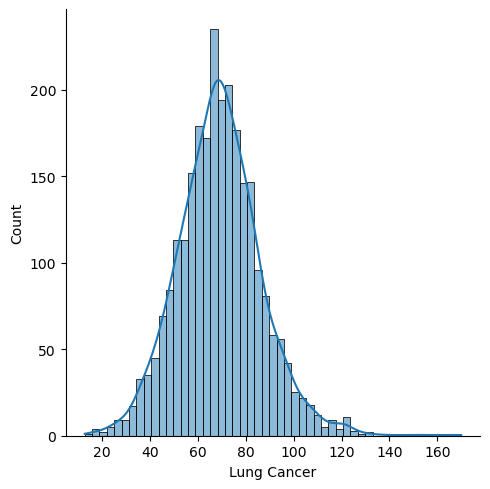

In [19]:
sns.displot(smoking_airquality_df, x='Lung Cancer', kde=True)

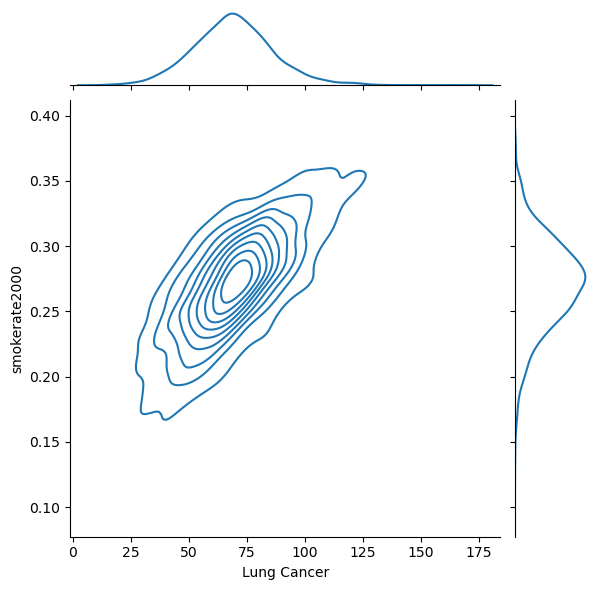

In [20]:
sns.jointplot(data=smoking_airquality_df, x='Lung Cancer', y='smokerate2000', kind='kde')

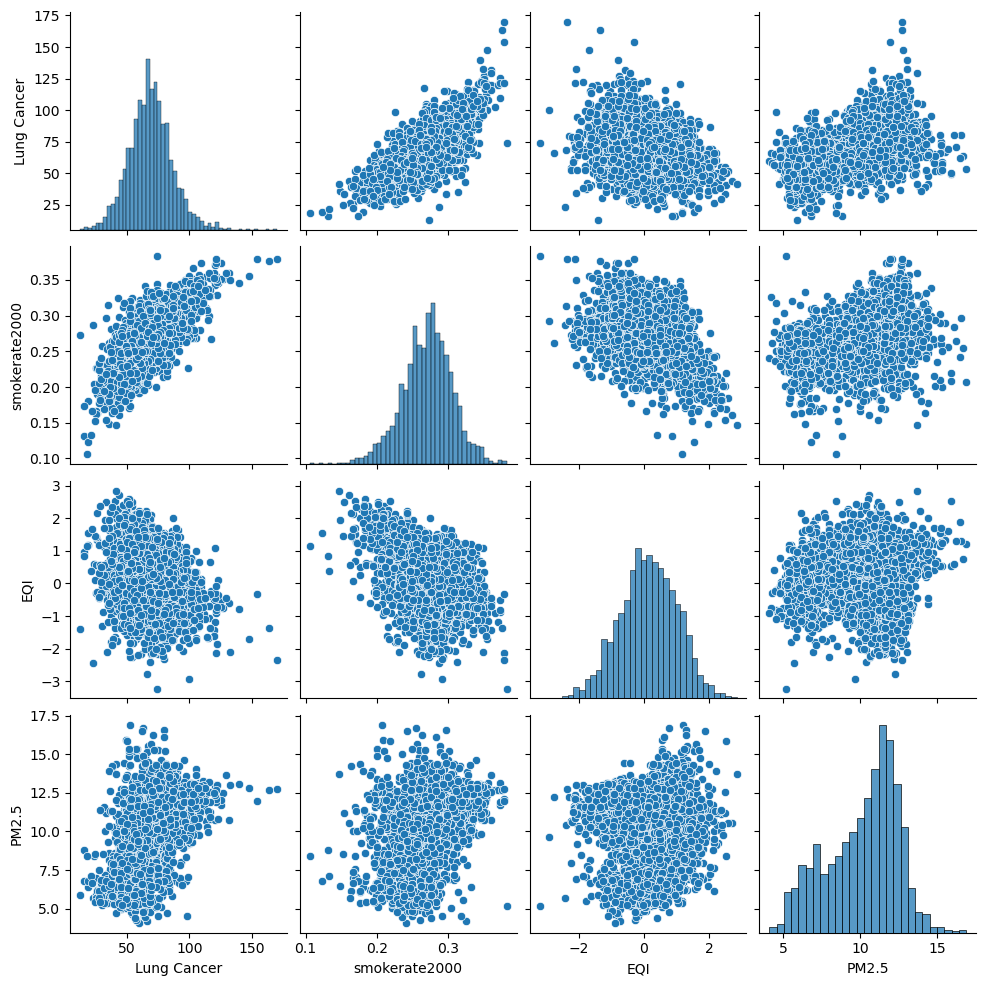

In [21]:
sns.pairplot(data=smoking_airquality_df, vars=['Lung Cancer', 'smokerate2000', 'EQI', 'PM2.5'])

# Model Selection

## Baseline Model with Linear Regression

### Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

# dropping location-based features to focus on air quality/smoking
X = smoking_airquality_df.drop(['Lung Cancer', 'FIPS_code', 'County', 'smokerate2000', 'Status Variable', 'LTD', 'Intercept', 'Slope', 'RT', 'State_Code', 'Status', 'LCI', 'UCI', 'AAC'], axis=1)
y = smoking_airquality_df['Lung Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 56)
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

-24.874433660056354
[ 1.83442522e+00 -1.68043852e+00  3.77880471e-01 -6.66697246e-01
 -5.19002430e-03 -3.74027476e-01  1.88223561e-04 -3.82552420e-04
  5.65518264e-05 -9.42527554e-04  4.29691937e+00 -1.46543879e-01
 -4.27619239e-01  2.09739903e-01  2.78332020e-01  7.67414085e-01
  2.79508150e+00  1.10247138e+00 -6.72975601e-01]


In [24]:
from sklearn import metrics
from mlxtend.evaluate import bias_variance_decomp

min_rss = np.sum((lm.intercept_ + lm.coef_*X_train.values - y_train.values.reshape(-1,1))**2)
print(min_rss, metrics.mean_squared_error(y_train, lm.predict(X_train))*len(X_train))

mse, bias,var = bias_variance_decomp(lm,
                                         X_train.values, y_train.to_numpy(), X_test.values, y_test.to_numpy(), 
                                         loss='mse', num_rounds=200, random_seed=100)

print('MSE: %s, Bias: %s, Var: %s ' %(mse.round(2),bias.round(2),var.round(2)))

340003615.2275335 279082.8488676541
MSE: 124.04, Bias: 122.9, Var: 1.14 


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = lm.predict(X_test)
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

8.86575169644652
123.43173888522563
0.578213208558314
